Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                128       
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_4 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_5 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 6

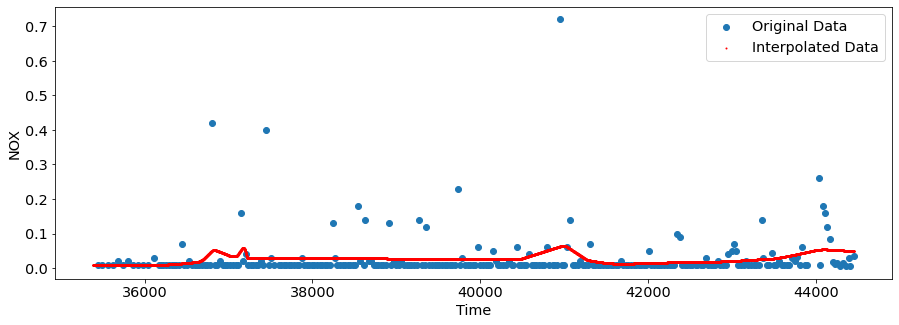

313/313 [==============================] - 0s 349us/step - loss: 8.5178e-18
['loss']


In [1]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
import tensorflow as tf
model = tf.keras.models.load_model('C:/Users/yanzh/Interpolation//NOX/saved_model/my_modelCD01A_NOX')
# Check its architecture
model.summary()

df = pd.read_csv("E:/1 My Project/Interpolated data/NOX_data/CD01A.csv")
time = df['time'].values
NOX = df['NOX'].values
df

#Transform the normalized scale to real scale
NOX_min = 0.005
NOX_max = 0.72
time_min = 35439.42                          
time_max = 44455.41                              

newtimepoints_scaled = np.linspace(time[0] - (time[1] - time[0]),time[-1], 10000)
y_predicted_scaled = model.predict(newtimepoints_scaled)

newtimepoints = newtimepoints_scaled*(time_max - time_min) + time_min
y_predicted = y_predicted_scaled*(NOX_max - NOX_min) + NOX_min

# Display the result
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)
plt.scatter(time*(time_max - time_min) + time_min, NOX*(NOX_max - NOX_min) + NOX_min, label='Original Data')
plt.scatter(newtimepoints, y_predicted, c = 'red', s = 1, label = 'Interpolated Data')
plt.xlabel('Time')
plt.ylabel('NOX')
plt.legend()
plt.show()

model.evaluate(newtimepoints_scaled, y_predicted_scaled, batch_size=32)
print(model.metrics_names)

In [2]:
interpolation = model.predict([0.003280747
,0.009824679
,0.01659044
,0.023356201
,0.030121962
,0.036887722
,0.043764397
,0.05030833
,0.05707409
,0.063839851
,0.070605612
,0.077371373
,0.236089464
,0.941614119
,0.944941542
,0.94837988
])
interpolation

array([[0.00454668],
       [0.00478887],
       [0.00503929],
       [0.00528972],
       [0.00554012],
       [0.00579053],
       [0.00604506],
       [0.00628725],
       [0.00653768],
       [0.00678809],
       [0.0070385 ],
       [0.00728893],
       [0.03483912],
       [0.06061507],
       [0.06282254],
       [0.06510355]], dtype=float32)